In [2]:
if __name__ == '__main__':
    from HSmodule import *
    from source.SimHashDetection import SimHashDetection
    from source.minHashDetection import MinHashDetection
    from source.BloomDetection import BloomDetection
    from source.FaissSearch import FaissSearch
    from source.Preprocessor import *
    import numpy as np
    import pandas as pd

e:\DSA\Extended_assign\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
if __name__ == '__main__':
    # 1. Đọc và chọn cột (làm lại từ đầu cho chắc)
    df_large = pd.read_csv('dataset/dataset_small.csv')
    df_large = df_large[['question1', 'question2']]

    # 2. Nối 2 cột thành một Series
    s = pd.concat([df_large['question1'], df_large['question2']])

    # 3. DÙNG .dropna() ĐỂ XÓA TẤT CẢ GIÁ TRỊ RỖNG (NaN)
    s_clean = s.dropna()

    # 4. Bây giờ mới chuyển thành list
    listText = s_clean.tolist()

    # Bây giờ listText của bạn sẽ sạch và chỉ chứa chuỗi


In [4]:
if __name__ == '__main__':
    import time
    def time_model(models, listText, amount):
        times = []
        listText_sample = listText[:amount]
        for model in models:
            start = time.time()
            model.detect(listText_sample)
            end = time.time()
            times.append(end - start)
        return times

In [11]:
if __name__ == '__main__':
    model1 = BloomDetection()
    model2 = MinHashDetection()
    model3 = SimHashDetection()
    listModel = [model1, model2, model3]
    model_names = ['BloomDetection', 'MinHashDetection', 'SimHashDetection']
    results_list = []

In [ ]:
time_model([model2], listText, 2000)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 4. CHẠY TÍNH TOÁN VÀ LƯU KẾT QUẢ (Không thay đổi)
# ==============================================================================

# Lưu ý: Code này giả định các biến df_large, listText, time_model, 
# listModel, và model_names đã được định nghĩa và chạy ở phần trước.

# CHẠY LẶP 2 LẦN (Cho 2 dải Amount khác nhau)

# Dải 1: Cho Model 0 và Model 2
amounts_set1 = np.linspace(500, 50000, 10).astype(int)



# Dùng list để lưu kết quả (sẽ nối cả hai dải)


print(f"Bắt đầu tính toán thời gian cho 3 mô hình...")

# --- THỰC HIỆN ĐO LƯỜNG Dải 1 (2000 -> 100000) ---
models_to_run_1 = [listModel[0], listModel[2]]
names_to_run_1 = [model_names[0], model_names[2]]

for amount in amounts_set1:
    print(f"Đang đo lường cho Amount = {amount}...")
    listText_sample = listText[:amount] # Cần cắt listText ở đây cho đúng logic time_model
    times = time_model(models_to_run_1, listText, amount)
    
    for i, model_name in enumerate(names_to_run_1):
        results_list.append({
            'Model': model_name,
            'Amount': amount,
            'Time (s)': times[i]
        })
        print(f"    Mô hình {model_name}: {times[i]:.4f} giây")





Bắt đầu tính toán thời gian cho 3 mô hình...
Đang đo lường cho Amount = 500...
Initializing index for metric 'cosine' with dimension 64...
    Mô hình BloomDetection: 0.4317 giây
    Mô hình SimHashDetection: 0.2066 giây
Đang đo lường cho Amount = 6000...
    Mô hình BloomDetection: 3.1091 giây
    Mô hình SimHashDetection: 2.6873 giây
Đang đo lường cho Amount = 11500...
    Mô hình BloomDetection: 5.0903 giây
    Mô hình SimHashDetection: 4.8046 giây
Đang đo lường cho Amount = 17000...
    Mô hình BloomDetection: 8.4864 giây
    Mô hình SimHashDetection: 7.4190 giây
Đang đo lường cho Amount = 22500...
    Mô hình BloomDetection: 11.0659 giây
    Mô hình SimHashDetection: 9.6624 giây
Đang đo lường cho Amount = 28000...
    Mô hình BloomDetection: 13.5386 giây
    Mô hình SimHashDetection: 11.8853 giây
Đang đo lường cho Amount = 33500...
    Mô hình BloomDetection: 15.5783 giây
    Mô hình SimHashDetection: 14.0939 giây
Đang đo lường cho Amount = 39000...
    Mô hình BloomDetection: 18.

In [13]:
if __name__ == '__main__':
    # Dải 2: Cho Model 1
    amounts_set2 = np.linspace(1000, 10000, 10).astype(int)
    # --- THỰC HIỆN ĐO LƯỜNG Dải 2 (400 -> 20000) ---
    models_to_run_2 = [listModel[1]]
    names_to_run_2 = [model_names[1]]

    for amount in amounts_set2:
        listText_sample = listText[:amount]
        times = time_model(models_to_run_2, listText, amount)
        print(f"Đang đo lường cho Amount = {amount}...")
        for i, model_name in enumerate(names_to_run_2):
            results_list.append({
                'Model': model_name,
                'Amount': amount,
                'Time (s)': times[i]
            })
            print(f"    Mô hình {model_name}: {times[i]:.4f} giây")


    

Đang đo lường cho Amount = 1000...
    Mô hình MinHashDetection: 2.7907 giây
Đang đo lường cho Amount = 2000...
    Mô hình MinHashDetection: 8.7939 giây
Đang đo lường cho Amount = 3000...
    Mô hình MinHashDetection: 16.7360 giây
Đang đo lường cho Amount = 4000...
    Mô hình MinHashDetection: 26.8872 giây
Đang đo lường cho Amount = 5000...
    Mô hình MinHashDetection: 37.1763 giây
Đang đo lường cho Amount = 6000...
    Mô hình MinHashDetection: 50.7222 giây
Đang đo lường cho Amount = 7000...
    Mô hình MinHashDetection: 72.1308 giây
Đang đo lường cho Amount = 8000...
    Mô hình MinHashDetection: 107.6250 giây
Đang đo lường cho Amount = 9000...
    Mô hình MinHashDetection: 136.6003 giây
Đang đo lường cho Amount = 10000...
    Mô hình MinHashDetection: 146.7441 giây


In [ ]:
print(results_list)

Tính toán hoàn tất.

--- Kết quả đo lường (5 dòng đầu) ---
              Model  Amount  Time (s)
0    BloomDetection     500  0.431685
1  SimHashDetection     500  0.206648
2    BloomDetection    6000  3.109088
3  SimHashDetection    6000  2.687273
4    BloomDetection   11500  5.090281

Đang vẽ 2 biểu đồ so sánh...


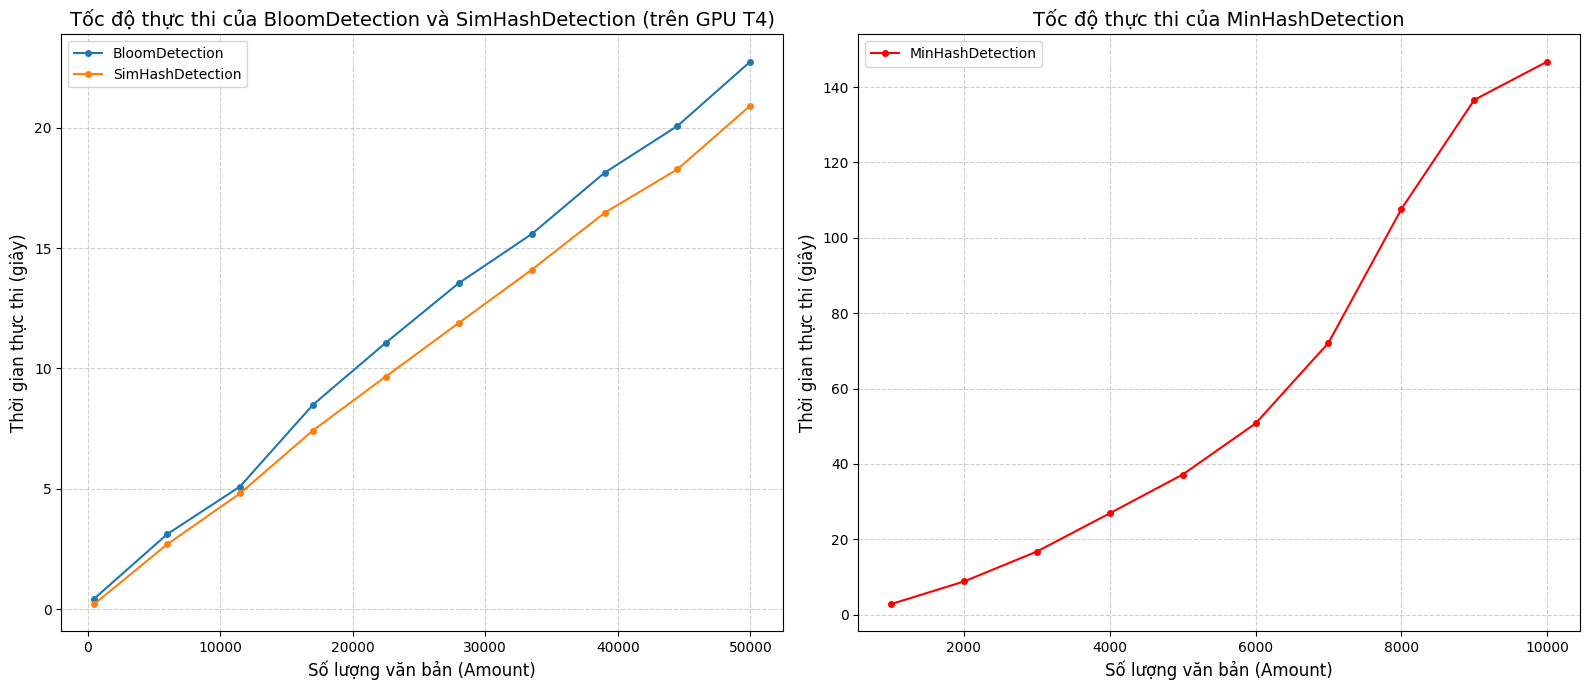

Hoàn tất.


: 

In [ ]:
print("Tính toán hoàn tất.")
df_results = pd.DataFrame(results_list)
print("\n--- Kết quả đo lường (5 dòng đầu) ---")
print(df_results.head())
# ==============================================================================
# 5. VẼ BIỂU ĐỒ ĐƯỜNG (SUBPLOTS)
# ==============================================================================

print("\nĐang vẽ 2 biểu đồ so sánh...")

# Khởi tạo figure với 2 subplot (1 hàng, 2 cột)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- BIỂU ĐỒ 1: Tốc độ thực thi Model 0 và Model 2 ---
target_models_1 = [model_names[0], model_names[2]]
df_plot_1 = df_results[df_results['Model'].isin(target_models_1)]

ax1.set_title(f"Tốc độ thực thi của {model_names[0]} và {model_names[2]} (trên GPU T4)", fontsize=14)
ax1.set_xlabel("Số lượng văn bản (Amount)", fontsize=12)
ax1.set_ylabel("Thời gian thực thi (giây)", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Vẽ từng đường trong subplot 1
for name in target_models_1:
    model_df = df_plot_1[df_plot_1['Model'] == name]
    ax1.plot(model_df['Amount'], model_df['Time (s)'], marker='o', markersize=4, label=name)

ax1.legend()


# --- BIỂU ĐỒ 2: Tốc độ thực thi Model 1 ---
target_models_2 = [model_names[1]]
df_plot_2 = df_results[df_results['Model'].isin(target_models_2)]

ax2.set_title(f"Tốc độ thực thi của {model_names[1]}", fontsize=14)
ax2.set_xlabel("Số lượng văn bản (Amount)", fontsize=12)
ax2.set_ylabel("Thời gian thực thi (giây)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Vẽ đường trong subplot 2
for name in target_models_2:
    model_df = df_plot_2[df_plot_2['Model'] == name]
    ax2.plot(model_df['Amount'], model_df['Time (s)'], marker='o', markersize=4, label=name, color='red')
    
ax2.legend()

# Tối ưu khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

print("Hoàn tất.")

Tính toán hoàn tất.

--- Kết quả đo lường (5 dòng đầu) ---
              Model  Amount  Time (s)
0    BloomDetection     500  0.431685
1  SimHashDetection     500  0.206648
2    BloomDetection    6000  3.109088
3  SimHashDetection    6000  2.687273
4    BloomDetection   11500  5.090281

Đang vẽ biểu đồ so sánh các Model...


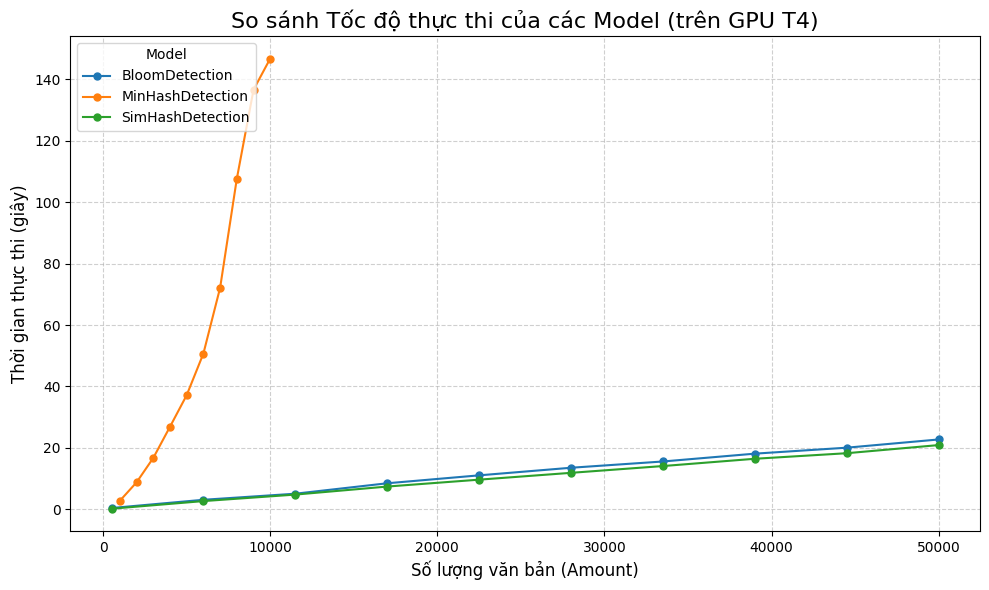

Hoàn tất.


In [16]:
print("Tính toán hoàn tất.")
df_results = pd.DataFrame(results_list)
print("\n--- Kết quả đo lường (5 dòng đầu) ---")
print(df_results.head())
# ==============================================================================
# 5. VẼ BIỂU ĐỒ ĐƯỜNG (MỘT BIỂU ĐỒ DUY NHẤT)
# ==============================================================================

print("\nĐang vẽ biểu đồ so sánh các Model...")

# Khởi tạo figure và trục (ax) duy nhất
# Kích thước figure có thể được giữ nguyên hoặc điều chỉnh
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# --- VẼ BIỂU ĐỒ Tốc độ thực thi CỦA TẤT CẢ CÁC MODEL ---

# Lấy danh sách tất cả các Model cần vẽ
all_models = model_names # Giả sử model_names chứa tên của 3 models (Model 0, 1, 2)

ax.set_title("So sánh Tốc độ thực thi của các Model (trên GPU T4)", fontsize=16)
ax.set_xlabel("Số lượng văn bản (Amount)", fontsize=12)
ax.set_ylabel("Thời gian thực thi (giây)", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Vẽ từng đường cho mỗi Model
for name in all_models:
    # Lọc dữ liệu cho Model hiện tại
    model_df = df_results[df_results['Model'] == name]
    
    # Vẽ đường và điểm
    ax.plot(model_df['Amount'], model_df['Time (s)'], marker='o', markersize=5, label=name)

# Thêm chú giải
ax.legend(title="Model", loc='upper left')

# Tối ưu bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

print("Hoàn tất.")

In [ ]:

from sentence_transformers import SentenceTransformer

# Khi bạn không chỉ định 'device', nó sẽ tự động chọn
# (Ưu tiên 'cuda' nếu có, nếu không thì 'cpu')
model = SentenceTransformer('all-MiniLM-L6-v2')

# In ra thiết bị mà model đang sử dụng
print(f"Model đang chạy trên thiết bị: {model.device}") 
# Hoặc an toàn hơn: print(f"Model đang chạy trên: {model._target_device}")